In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feature_engine.transformation as vt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv(
    filepath_or_buffer="./data/winequality-red.csv",
)
data.sample(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
351,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.40,6
479,9.4,0.685,0.11,2.7,0.077,6.0,31.0,0.99840,3.19,0.70,10.10,6
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.00,6
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.10,5
1515,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.25,6


In [191]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

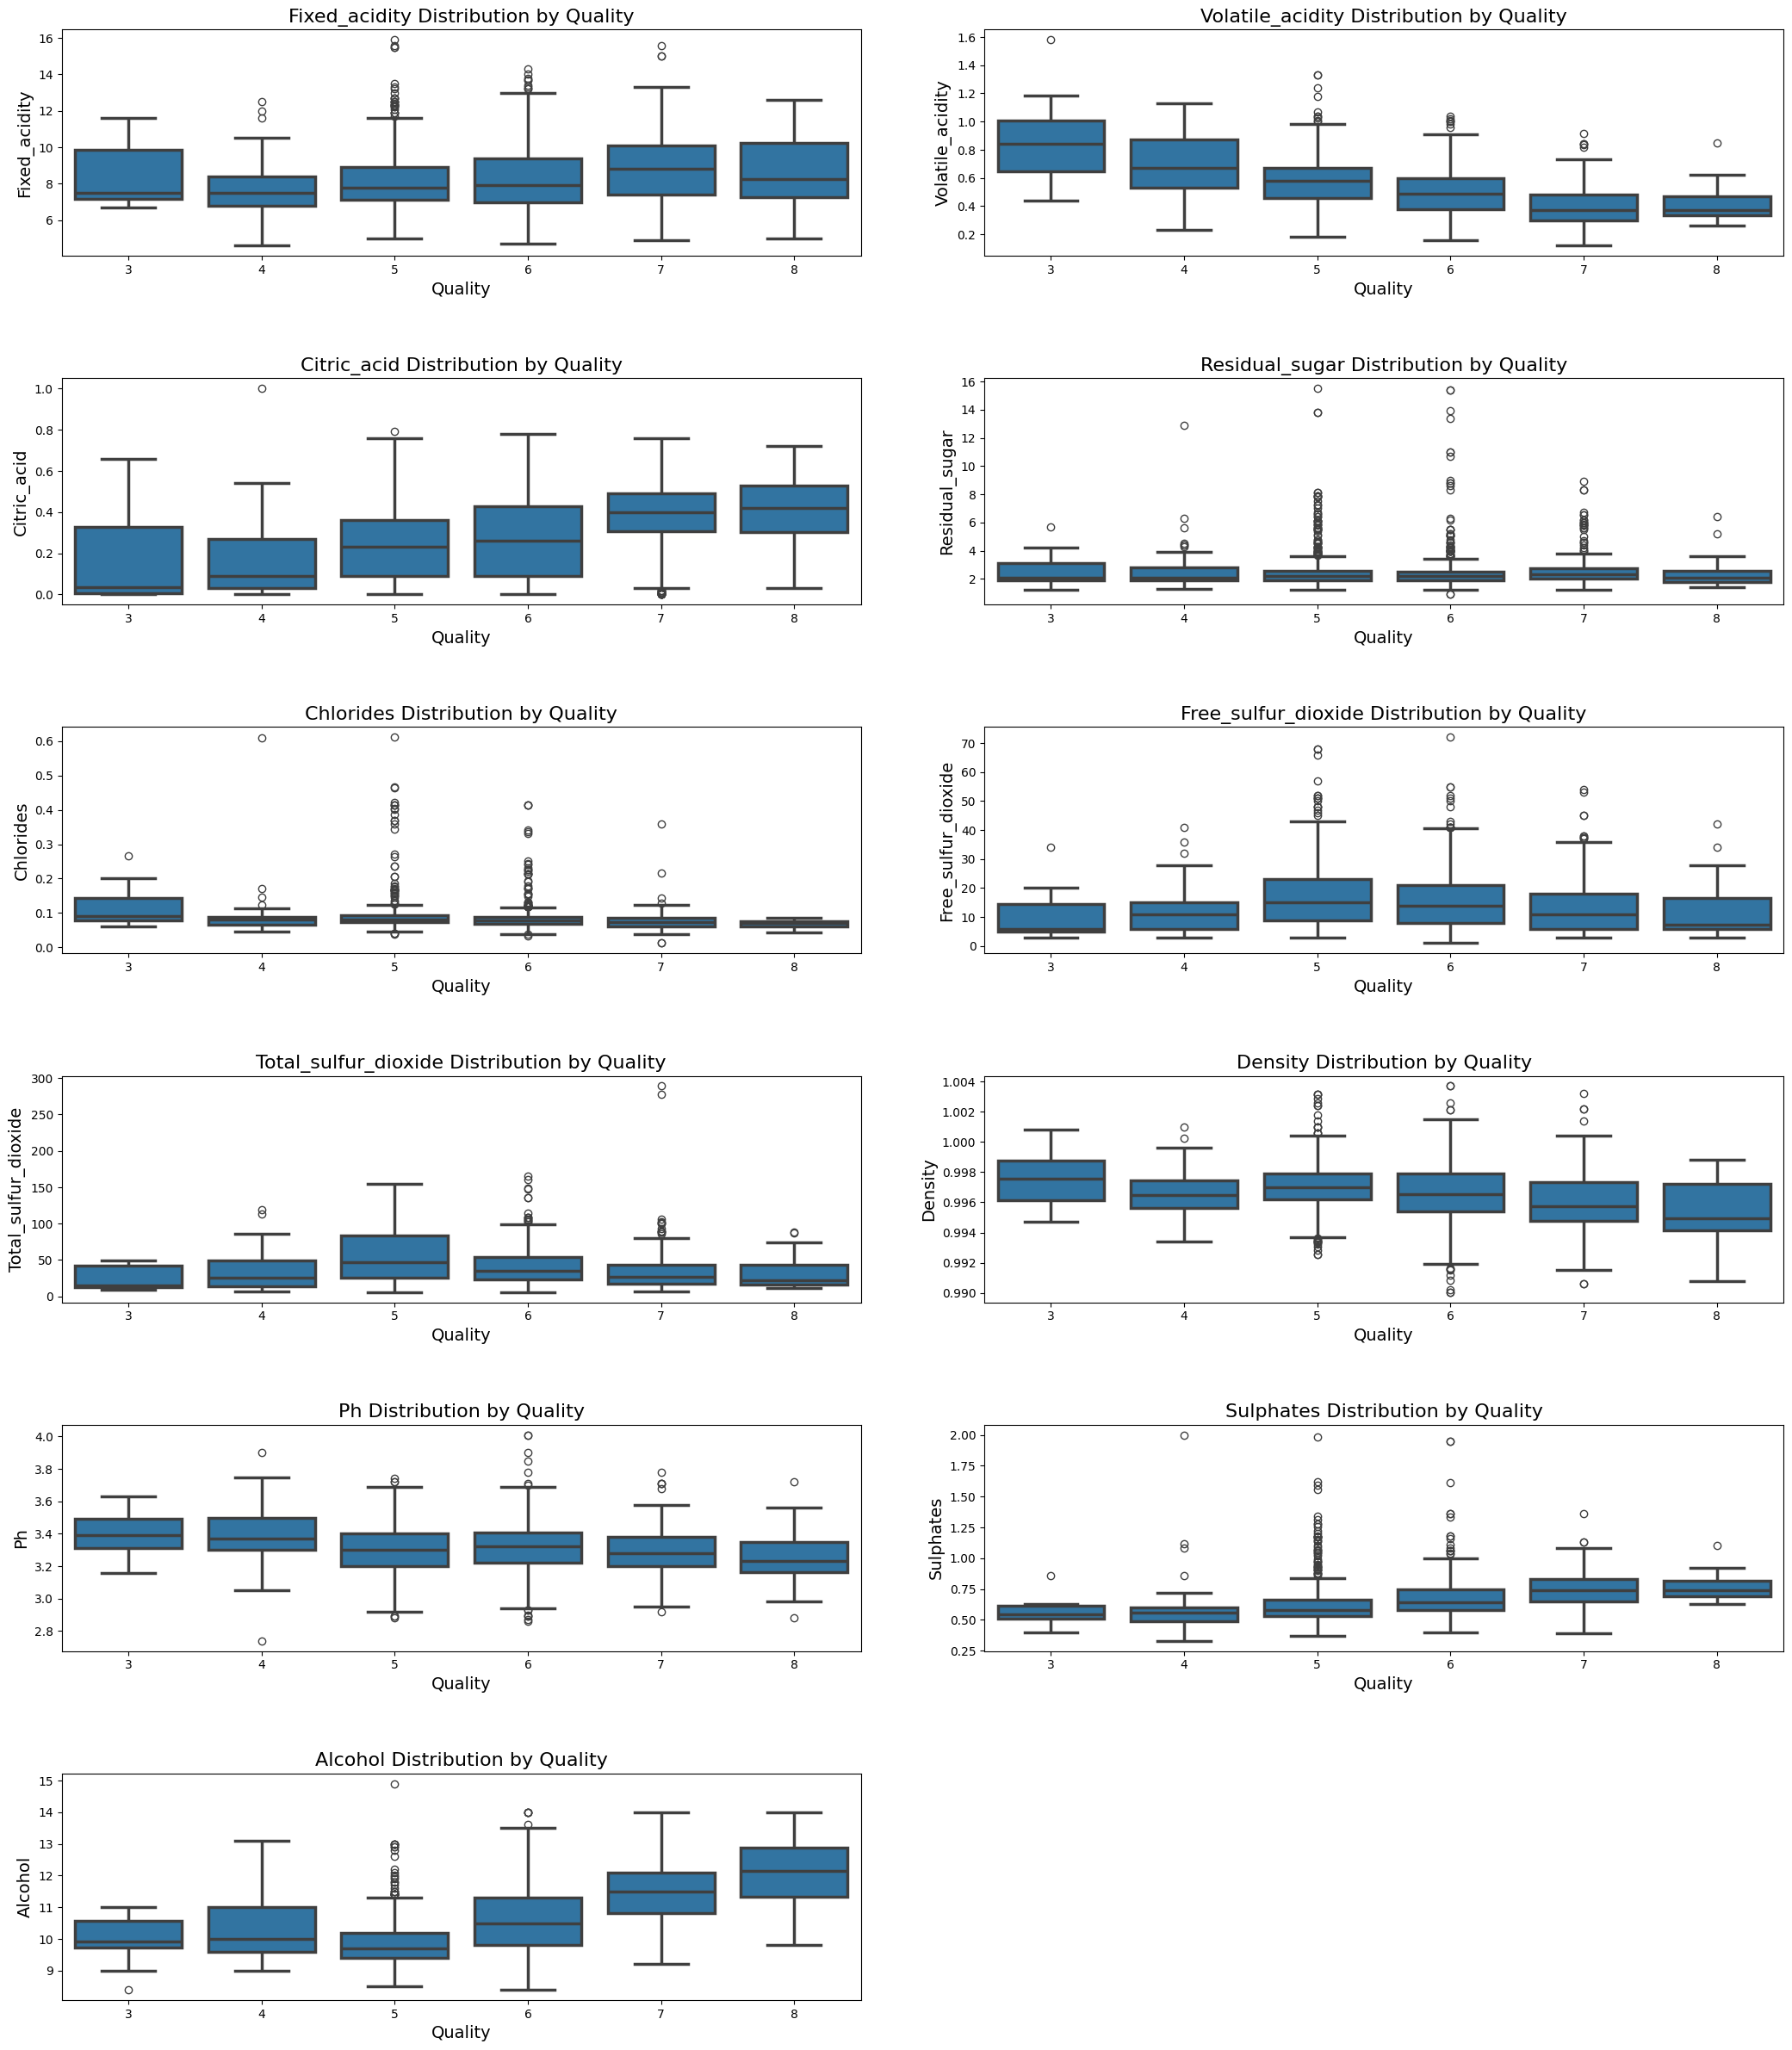

In [192]:
plt.figure(figsize=(22, 25))



columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',

           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',

           'pH', 'sulphates', 'alcohol']



for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.boxplot(x='quality', y=columns[i-1], data=data, linewidth=2.5, fliersize=6)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)



plt.tight_layout(pad=5.0)

plt.show()

In [193]:
data[columns] = data[columns].apply(np.log1p)

In [194]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [195]:
bins = (2, 4, 6, 9)
group_names = ['bad', 'good', 'excellence']
data['quality'] = pd.cut(data['quality'], bins=bins, labels=group_names)

In [196]:
encoder = LabelEncoder()
data['quality'] = encoder.fit_transform(data['quality'])
data['quality'].value_counts()

quality
2    1319
1     217
0      63
Name: count, dtype: int64

In [197]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis=1),
                                                    data['quality'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [198]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [199]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [200]:
y_pred = model.predict(X_test)

In [201]:
#print accuracy
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8328865058087578
0.8604166666666667


In [202]:
import pickle

In [203]:
with open(file="lr.pkl", mode="wb") as lr_file:
    pickle.dump(obj=model, file=lr_file)

In [204]:
with open(file="lr.pkl", mode="rb") as lr_file:
    lr_loaded = pickle.load(file=lr_file)
    print(lr_loaded)

LogisticRegression()


In [205]:
with open(file="lr.pkl", mode="rb") as lr_file:
    lr_loaded = pickle.load(file=lr_file)
    print(lr_loaded)

LogisticRegression()


In [206]:
lr_loaded.score(X=X_test, y=y_test)

0.8604166666666667

In [207]:
data.drop('quality', axis=1).columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [208]:
with open(file="le.pkl", mode="wb") as le_file:
    pickle.dump(obj=encoder, file=le_file)

In [209]:
with open(file="le.pkl", mode="rb") as le_file:
    le_loaded = pickle.load(file=le_file)

In [210]:
with open(file="ss.pkl", mode="wb") as ss_file:
    pickle.dump(obj=scaler, file=ss_file)

In [211]:
with open(file="ss.pkl", mode="rb") as ss_file:
    ss_loaded = pickle.load(file=ss_file)

In [212]:
# Check the accuracy of the loaded model
y_pred_loaded = lr_loaded.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))

Accuracy of loaded model: 0.8604166666666667
